# Temporal evolution

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.2.0rc4


In [5]:
def t_adiab(R_H,BulckFactor,vs=3E10):
    return R_H/(vs*BulckFactor)

In [7]:
from jetset.jet_model import Jet

def build_jet():
    my_jet_acc = Jet(beaming_expr='bulk_theta',electron_distribution='plc',name='jet_acc')
    my_jet_acc.parameters.BulkFactor.val=15
    my_jet_acc.parameters.theta.val=5
    my_jet_acc.parameters.z_cosm.val=0.001
    my_jet_acc.parameters.gmin.val=1
    my_jet_acc.parameters.gmax.val=1E5
    my_jet_acc.parameters.R.val=1E14
    my_jet_acc.parameters.R_H.val=1E17
    my_jet_acc.parameters.B.val=1
    my_jet_acc.parameters.gamma_cut.val=1E4
    my_jet_acc.parameters.p.val=2
    return my_jet_acc


In [8]:
my_jet_acc=build_jet()
my_jet_acc


--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: jet_acc  

electrons distribution:
 type: plc  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_acc,R,region_size,cm,1.000000e+14,1.000000e+03,1.000000e+30,False,False
jet_acc,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_acc,B,magnetic_field,gauss,1.000000e+00,0.000000e+00,--,False,False
jet_acc,theta,jet-viewing-angle,deg,5.000000e+00,0.000000e+00,--,False,False
jet_acc,BulkFactor,jet-bulk-factor,lorentz-factor*,1.500000e+01,1.000000e+00,--,False,False
jet_acc,z_cosm,redshift,,1.000000e-03,0.000000e+00,--,False,False
jet_acc,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_acc,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+05,1.000000e+00,1.000000e+15,False,False
jet_acc,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_acc,gamma_cut,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


--------------------------------------------------------------------------------


None

## setting the injection distribution

1) using the EmittersFactory

In [28]:
from jetset.jet_emitters_factory import EmittersFactory
q_inj=InjEmittersFactory().create_inj_emitters('pl',emitters_type='electrons',normalize=True)
q_inj.parameters.gmax.val=5

In [29]:
q_inj.parameters

name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
gmax,high-energy-cut-off,lorentz-factor*,5.000000e+00,1.000000e+00,1.000000e+15,False,False
Q,emitters_density,1 / (cm3 s),1.000000e-03,0.000000e+00,--,False,False
p,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


None

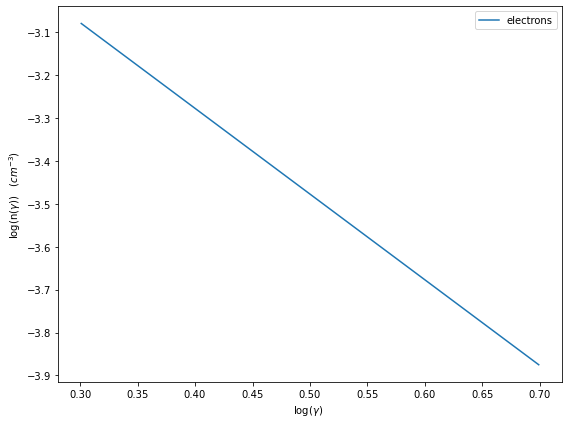

In [31]:
p=q_inj.plot()


2) using a custom array distribution

In [32]:
gamma=np.logspace(np.log10(2),np.log10(5),100)

#gamma array this is n(\gamma) in 1/cm^3/gamma 
n_gamma=gamma**-2

In [33]:
from jetset.jet_emitters import InjEmittersArrayDistribution
q_inj_array=InjEmittersArrayDistribution(name='array_distr',emitters_type='electrons',gamma_array=gamma,n_gamma_array=n_gamma,normalize=True)

In [34]:
q_inj_array.parameters

name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
gmax,high-energy-cut-off,lorentz-factor*,5.000000e+00,1.000000e+00,1.000000e+15,False,False
Q,emitters_density,1 / (cm3 s),1.000000e+00,0.000000e+00,--,False,False


None

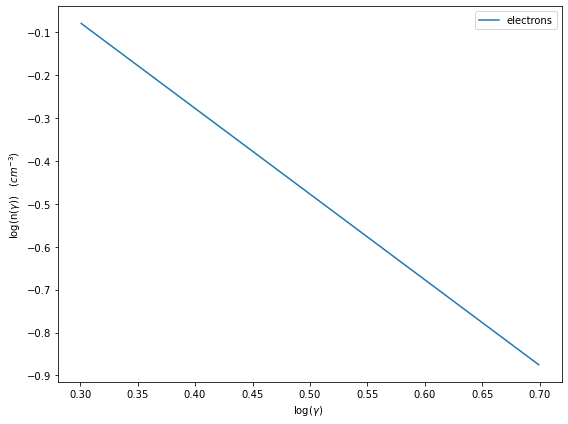

In [35]:
p=q_inj_array.plot()

In [21]:
from jetset.jet_timedep import  JetTimeEvol

In [36]:
my_jet_acc=build_jet()
temp_ev_acc=JetTimeEvol(jet=my_jet_acc,Q_inj=q_inj_array,inplace=True)




duration=1E4
duration_acc=1E4
T_SIZE=np.int(1E4)

temp_ev_acc.parameters.duration.val=duration
temp_ev_acc.parameters.TStart_Acc.val=0
temp_ev_acc.parameters.TStop_Acc.val=duration*0.5
temp_ev_acc.parameters.TStart_Inj.val=0
temp_ev_acc.parameters.TStop_Inj.val=duration*0.5
temp_ev_acc.parameters.T_esc.val=3
temp_ev_acc.parameters.t_D0.val=4000
temp_ev_acc.parameters.t_A0.val=2000
temp_ev_acc.parameters.Esc_Index.val=0
temp_ev_acc.parameters.Acc_Index.val=1
temp_ev_acc.parameters.Diff_Index.val=2
temp_ev_acc.parameters.T_SIZE.val=T_SIZE
temp_ev_acc.parameters.NUM_SET.val=200
temp_ev_acc._temp_ev.do_Compton_cooling=0
temp_ev_acc.parameters.L_inj.val=4E37
temp_ev_acc.parameters.LOG_SET.val=0

temp_ev_acc.parameters.gmin_grid.val=1.1
temp_ev_acc.parameters.gmax_grid.val=1E7
temp_ev_acc.parameters.gamma_grid_size.val=1000
temp_ev_acc.init_TempEv()

temp_ev_acc.show_model()

--------------------------------------------------------------------------------
JetTimeEvol model description
--------------------------------------------------------------------------------
 
physical setup: 

--------------------------------------------------------------------------------


name,par type,val,units,val*,units*,log
delta t,time,1.0,s,0.00029979245799999996,R/c,False
R/c,time,3335.6409519815206,s,1.0,R/c,False
Diff coeff,,0.00025,s-1,None,,False
Acc coeff,,0.0005,s-1,None,,False
Diff index,,2.0,,None,,False
Acc index,,1.0,s-1,None,,False
Tesc,time,10006.922855944562,s,3.0,R/c,False
T_A0=1/ACC_COEFF,time,2000.0,s,0.599584916,R/c,False
T_D0=1/DIFF_COEFF,time,4000.0,s,1.199169832,R/c,False
T_DA0=1/(2*DIFF_COEFF),time,2000.0,s,0.599584916,R/c,False



model parameters: 

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_time_ev,duration,time_grid,s,1.000000e+04,0.000000e+00,--,False,True
jet_time_ev,gmin_grid,gamma_grid,,1.100000e+00,0.000000e+00,--,False,True
jet_time_ev,gmax_grid,gamma_grid,,1.000000e+07,0.000000e+00,--,False,True
jet_time_ev,gamma_grid_size,gamma_grid,,1.000000e+03,0.000000e+00,--,False,True
jet_time_ev,TStart_Acc,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Acc,time_grid,s,5.000000e+03,0.000000e+00,--,False,True
jet_time_ev,TStart_Inj,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Inj,time_grid,s,5.000000e+03,0.000000e+00,--,False,True
jet_time_ev,T_esc,escape_time,(R/c)*,3.000000e+00,--,--,False,True
jet_time_ev,Esc_Index,fp_coeff_index,,0.000000e+00,--,--,False,True


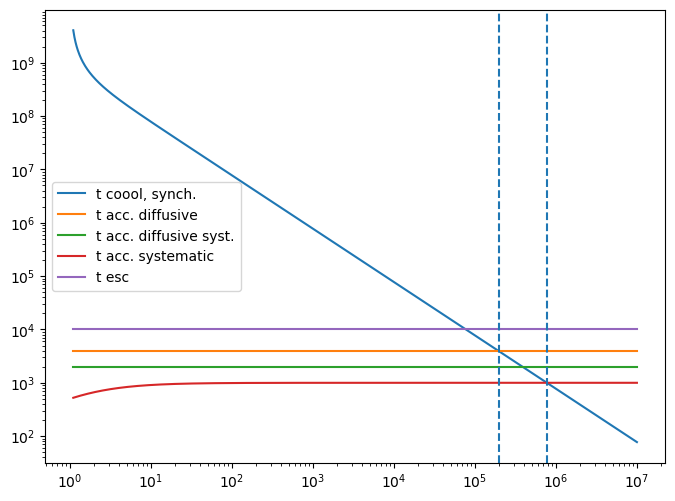

In [37]:
p=temp_ev_acc.plot_pre_run_plot(dpi=100)

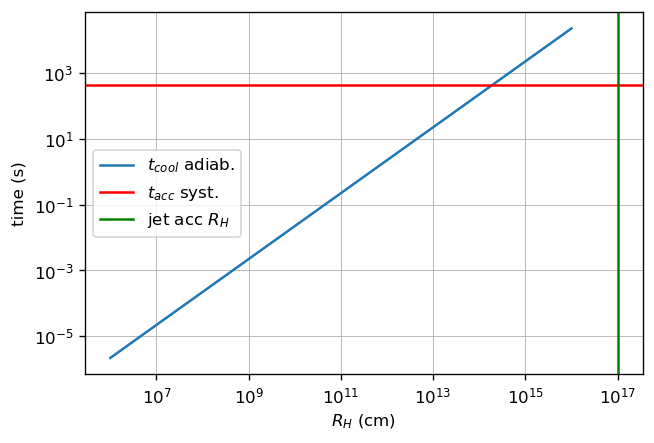

In [38]:
t_acc_sys=1/(1/temp_ev_acc.t_A_pre_run[0] + 1/temp_ev_acc.t_DA_pre_run[0])
z=np.logspace(6,16,100)
t_cool_adiab=t_adiab(R_H=z,BulckFactor=my_jet_acc.parameters.BulkFactor.val)
fig = plt.figure(dpi=120)
ax= fig.add_subplot(111)
ax.loglog(z,t_cool_adiab,label='$t_{cool}$ adiab.' )
ax.axhline(t_acc_sys,c='red',label='$t_{acc}$ syst.')
ax.axvline(my_jet_acc.parameters.R_H.val,label='jet acc $R_H$',c='g')
ax.set_xlabel('$R_{H}$ (cm)')
ax.set_ylabel('time (s)')
ax.legend()
ax.grid(linewidth=0.5,which='both')

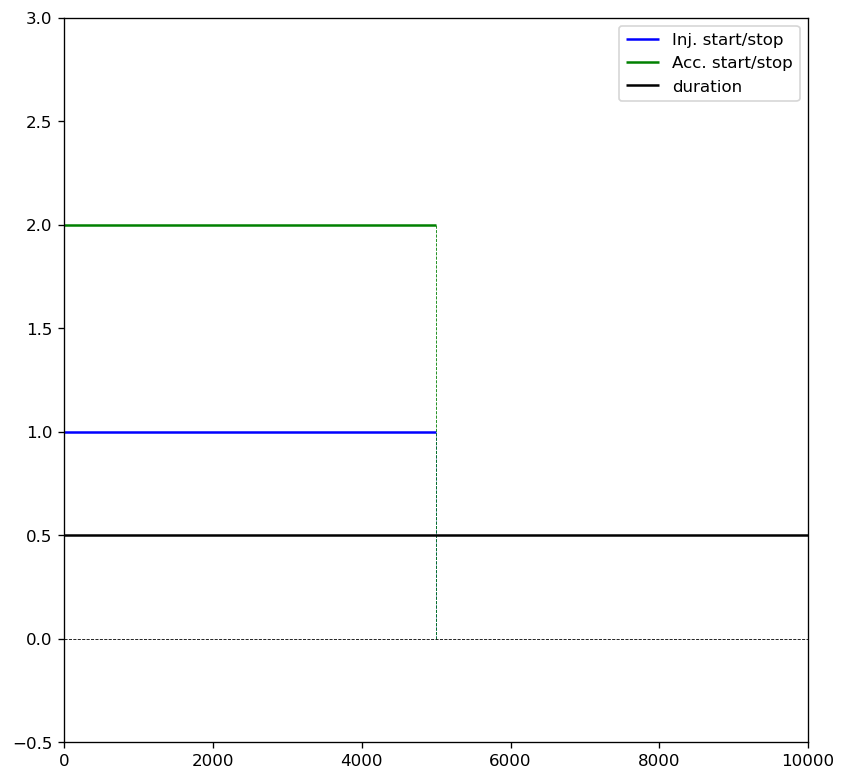

In [39]:
p=temp_ev_acc.plot_time_profile()

In [40]:
#temp_ev_acc._temp_ev.Q_scaling_factor,my_jet_acc._blob.E_tot_e*temp_ev_acc._temp_ev.Q_scaling_factor

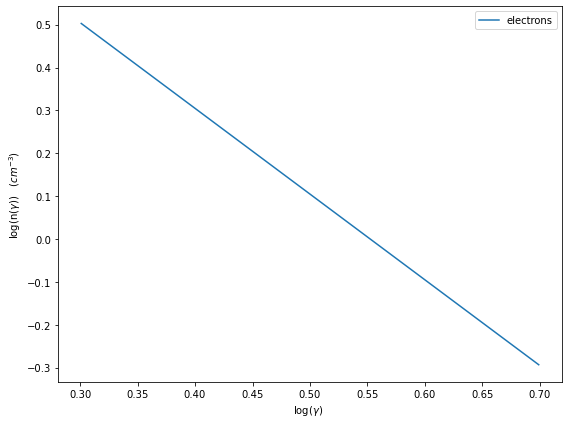

In [41]:
p=temp_ev_acc.Q_inj.plot()

## running cooling and acc using only injection

In [42]:
temp_ev_acc.run(only_injection=True)


temporal evolution running


  0%|          | 0/10000 [00:00<?, ?it/s]

temporal evolution completed


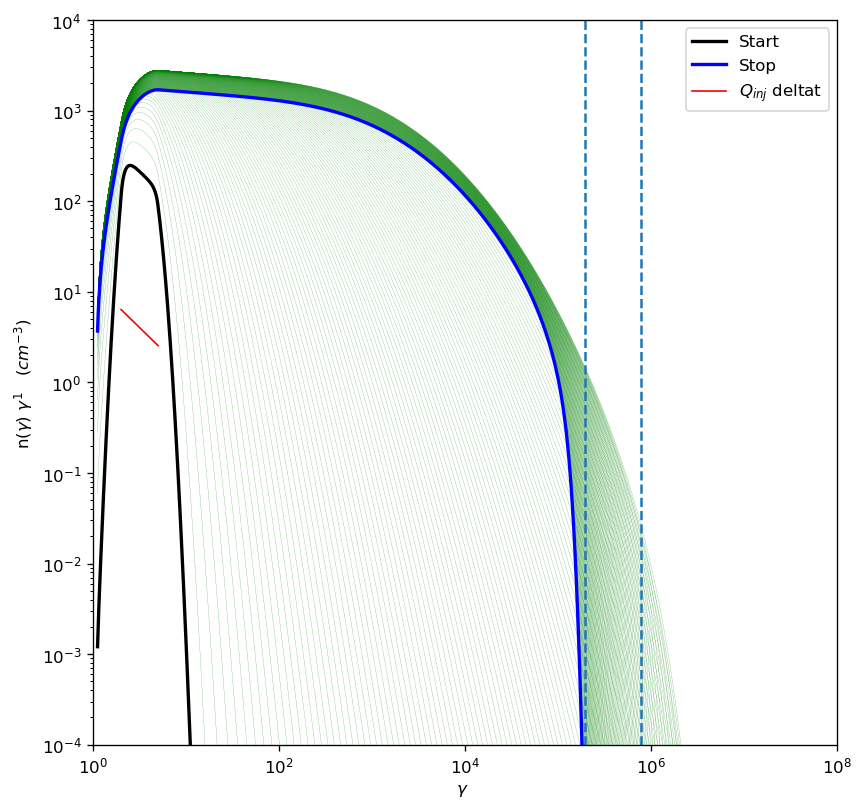

In [43]:
p=temp_ev_acc.plot_TempEv_emitters(loglog=False,energy_unit='gamma',pow=1)
p.ax.axvline(temp_ev_acc._temp_ev.gamma_eq_t_A, ls='--')
p.ax.axvline(temp_ev_acc._temp_ev.gamma_eq_t_D, ls='--')
p.rescale(x_max=1E8,x_min=1,y_min=1E-4,y_max=1E4)

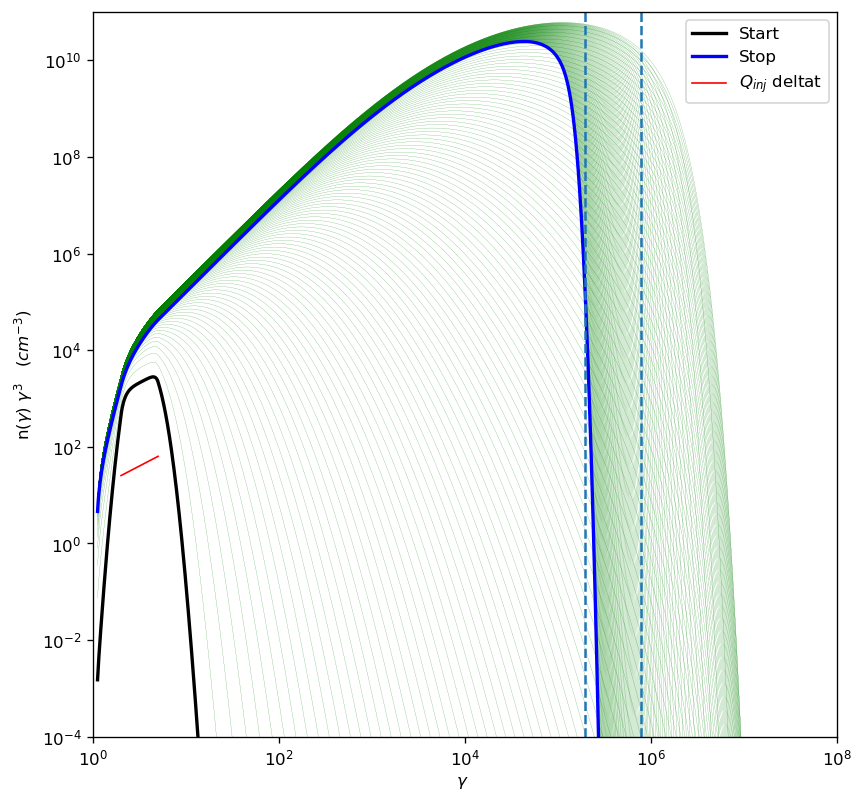

In [44]:
p=temp_ev_acc.plot_TempEv_emitters(loglog=False,energy_unit='gamma',pow=3)
p.ax.axvline(temp_ev_acc._temp_ev.gamma_eq_t_A, ls='--')
p.ax.axvline(temp_ev_acc._temp_ev.gamma_eq_t_D, ls='--')
p.rescale(x_max=1E8,x_min=1,y_min=1E-4,y_max=1E11)

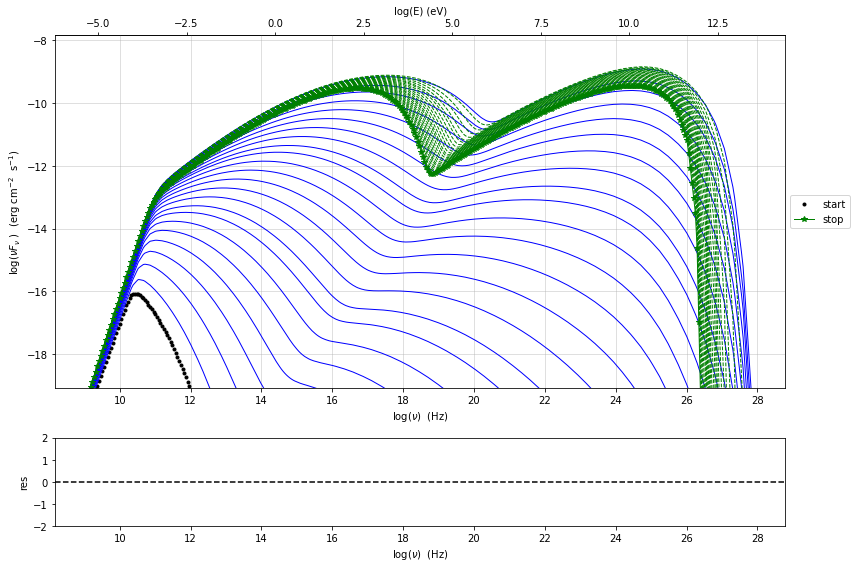

In [45]:
temp_ev_acc.plot_model(10,199,50)

Text(0, 0.5, 'flux au')

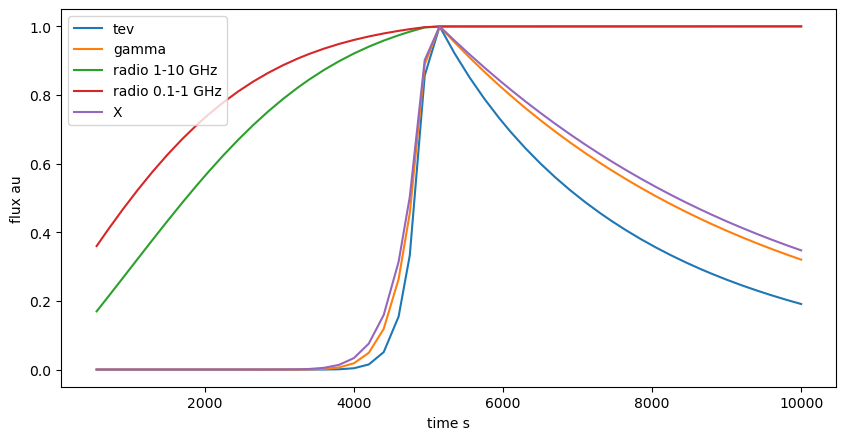

In [61]:
fig=plt.figure(figsize=(10,5),dpi=100)

xt,yt=temp_ev_acc.make_lc(10,199,1E24,1E27)
plt.plot(xt,yt/yt.max(),label='tev')

xg,yg=temp_ev_acc.make_lc(10,199,1E21,1E24)
plt.plot(xg,yg/yg.max(),label='gamma')

xrh,yrh=temp_ev_acc.make_lc(10,199,1E9,1E10)
plt.plot(xrh,yrh/yrh.max(),label='radio 1-10 GHz')

xrl,yrl=temp_ev_acc.make_lc(10,199,1E8,1E9)
plt.plot(xrl,yrl/yrl.max(),label='radio 0.1-1 GHz')

xx,yx=temp_ev_acc.make_lc(10,199,1E16,1E18)
plt.plot(xx,yx/yx.max(),label='X')
plt.legend()
plt.xlabel('time s')
plt.ylabel('flux au')

Text(0, 0.5, 'flux/max')

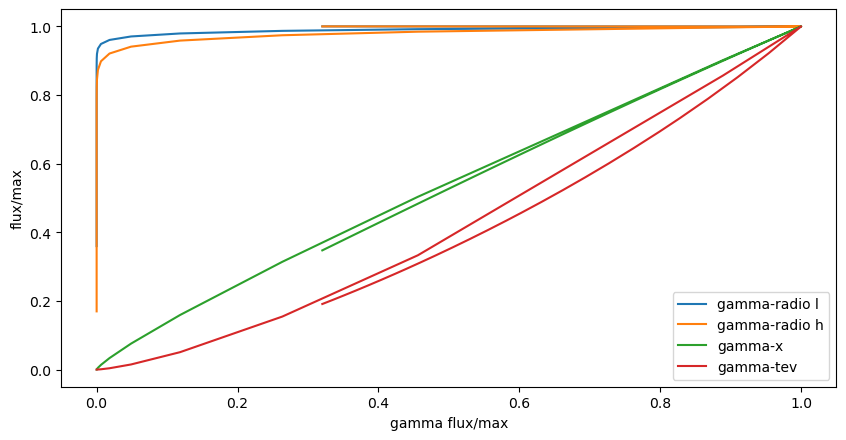

In [62]:
fig=plt.figure(figsize=(10,5),dpi=100)
plt.plot(yg/yg.max(),yrl/yrl.max(),label='gamma-radio l')
plt.plot(yg/yg.max(),yrh/yrh.max(),label='gamma-radio h')
plt.plot(yg/yg.max(),yx/yx.max(),label='gamma-x')
plt.plot(yg/yg.max(),yt/yt.max(),label='gamma-tev')
plt.legend()
plt.xlabel('gamma flux/max')
plt.ylabel('flux/max')

In [63]:
temp_ev_acc.jet


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: jet_acc  

electrons distribution:
 type: time_dep  
 gamma energy grid size:  201
 gmin grid : 1.100000e+00
 gmax grid : 1.000000e+07
 normalization  False
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

-------------------------------------------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_acc,R,region_size,cm,1.000000e+14,1.000000e+03,1.000000e+30,False,False
jet_acc,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_acc,B,magnetic_field,gauss,1.000000e+00,0.000000e+00,--,False,False
jet_acc,theta,jet-viewing-angle,deg,5.000000e+00,0.000000e+00,--,False,False
jet_acc,BulkFactor,jet-bulk-factor,lorentz-factor*,1.500000e+01,1.000000e+00,--,False,False
jet_acc,z_cosm,redshift,,1.000000e-03,0.000000e+00,--,False,False
jet_acc,gmin,low-energy-cut-off,lorentz-factor*,1.100000e+00,1.000000e+00,1.000000e+09,False,False
jet_acc,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+07,1.000000e+00,1.000000e+15,False,False
jet_acc,N,scaling_factor,,1.000000e+00,0.000000e+00,--,False,False


-------------------------------------------------------------------------------------------------------------------


None

In [22]:
j=Jet()

In [23]:
j


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: plc  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

-------------------------------------------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_leptonic,gamma_cut,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


-------------------------------------------------------------------------------------------------------------------


None

## running cooling and acc on injetcion plus input jet

In [64]:
my_jet_acc=build_jet()
temp_ev_acc=JetTimeEvol(jet=my_jet_acc,Q_inj=Q_inj,inplace=True)

In [65]:
duration=1E4
duration_acc=1E4
T_SIZE=np.int(1E4)

temp_ev_acc.parameters.duration.val=duration
temp_ev_acc.parameters.TStart_Acc.val=0
temp_ev_acc.parameters.TStop_Acc.val=duration*0.5
temp_ev_acc.parameters.TStart_Inj.val=0
temp_ev_acc.parameters.TStop_Inj.val=duration*0.5
temp_ev_acc.parameters.T_esc.val=3
temp_ev_acc.parameters.t_D0.val=4000
temp_ev_acc.parameters.t_A0.val=2000
temp_ev_acc.parameters.Esc_Index.val=0
temp_ev_acc.parameters.Acc_Index.val=1
temp_ev_acc.parameters.Diff_Index.val=2
temp_ev_acc.parameters.T_SIZE.val=T_SIZE
temp_ev_acc.parameters.NUM_SET.val=200
temp_ev_acc._temp_ev.do_Compton_cooling=0
temp_ev_acc.parameters.L_inj.val=4E37
temp_ev_acc.parameters.LOG_SET.val=0

temp_ev_acc.parameters.gmin_grid.val=1.1
temp_ev_acc.parameters.gmax_grid.val=1E7
temp_ev_acc.parameters.gamma_grid_size.val=1000
temp_ev_acc.init_TempEv()

temp_ev_acc.show_model()

-------------------------------------------------------------------------------------------------------------------
JetTimeEvol model description
-------------------------------------------------------------------------------------------------------------------
 
physical setup: 

-------------------------------------------------------------------------------------------------------------------


name,par type,val,units,val*,units*,log
delta t,time,1.0,s,0.00029979245799999996,R/c,False
R/c,time,3335.6409519815206,s,1.0,R/c,False
Diff coeff,,0.00025,s-1,None,,False
Acc coeff,,0.0005,s-1,None,,False
Diff index,,2.0,,None,,False
Acc index,,1.0,s-1,None,,False
Tesc,time,10006.922855944562,s,3.0,R/c,False
T_A0=1/ACC_COEFF,time,2000.0,s,0.599584916,R/c,False
T_D0=1/DIFF_COEFF,time,4000.0,s,1.199169832,R/c,False
T_DA0=1/(2*DIFF_COEFF),time,2000.0,s,0.599584916,R/c,False



model parameters: 

-------------------------------------------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_time_ev,duration,time_grid,s,1.000000e+04,0.000000e+00,--,False,True
jet_time_ev,gmin_grid,gamma_grid,,1.100000e+00,0.000000e+00,--,False,True
jet_time_ev,gmax_grid,gamma_grid,,1.000000e+07,0.000000e+00,--,False,True
jet_time_ev,gamma_grid_size,gamma_grid,,1.000000e+03,0.000000e+00,--,False,True
jet_time_ev,TStart_Acc,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Acc,time_grid,s,5.000000e+03,0.000000e+00,--,False,True
jet_time_ev,TStart_Inj,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Inj,time_grid,s,5.000000e+03,0.000000e+00,--,False,True
jet_time_ev,T_esc,escape_time,(R/c)*,3.000000e+00,--,--,False,True
jet_time_ev,Esc_Index,fp_coeff_index,,0.000000e+00,--,--,False,True


In [66]:
temp_ev_acc.run(only_injection=False)


temporal evolution running


temporal evolution completed


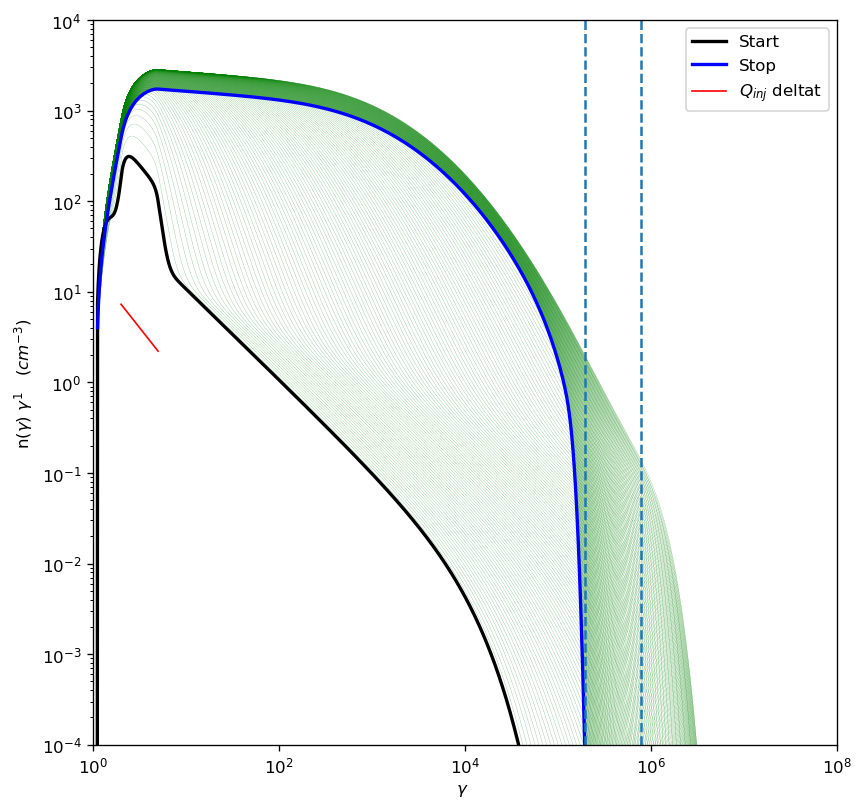

In [67]:
p=temp_ev_acc.plot_TempEv_emitters(loglog=False,energy_unit='gamma',pow=1)
p.ax.axvline(temp_ev_acc._temp_ev.gamma_eq_t_A, ls='--')
p.ax.axvline(temp_ev_acc._temp_ev.gamma_eq_t_D, ls='--')
p.rescale(x_max=1E8,x_min=1,y_min=1E-4,y_max=1E4)

## running only cooling input jet

In [68]:
my_jet_acc=build_jet()
temp_ev_acc=JetTimeEvol(jet=my_jet_acc,inplace=True)

In [69]:
duration=1E4
duration_acc=1E4
T_SIZE=np.int(1E4)

temp_ev_acc.parameters.duration.val=duration
temp_ev_acc.parameters.TStart_Acc.val=0
temp_ev_acc.parameters.TStop_Acc.val=duration*0
temp_ev_acc.parameters.TStart_Inj.val=0
temp_ev_acc.parameters.TStop_Inj.val=0
temp_ev_acc.parameters.T_esc.val=3
temp_ev_acc.parameters.t_D0.val=4000
temp_ev_acc.parameters.t_A0.val=2000
temp_ev_acc.parameters.Esc_Index.val=0
temp_ev_acc.parameters.Acc_Index.val=1
temp_ev_acc.parameters.Diff_Index.val=2
temp_ev_acc.parameters.T_SIZE.val=T_SIZE
temp_ev_acc.parameters.NUM_SET.val=200
temp_ev_acc._temp_ev.do_Compton_cooling=0
temp_ev_acc.parameters.L_inj.val=4E37
temp_ev_acc.parameters.LOG_SET.val=0

temp_ev_acc.parameters.gmin_grid.val=1.1
temp_ev_acc.parameters.gmax_grid.val=1E7
temp_ev_acc.parameters.gamma_grid_size.val=1000
temp_ev_acc.init_TempEv()

temp_ev_acc.show_model()

-------------------------------------------------------------------------------------------------------------------
JetTimeEvol model description
-------------------------------------------------------------------------------------------------------------------
 
physical setup: 

-------------------------------------------------------------------------------------------------------------------


name,par type,val,units,val*,units*,log
delta t,time,1.0,s,0.00029979245799999996,R/c,False
R/c,time,3335.6409519815206,s,1.0,R/c,False
Diff coeff,,0.00025,s-1,None,,False
Acc coeff,,0.0005,s-1,None,,False
Diff index,,2.0,,None,,False
Acc index,,1.0,s-1,None,,False
Tesc,time,10006.922855944562,s,3.0,R/c,False
T_A0=1/ACC_COEFF,time,2000.0,s,0.599584916,R/c,False
T_D0=1/DIFF_COEFF,time,4000.0,s,1.199169832,R/c,False
T_DA0=1/(2*DIFF_COEFF),time,2000.0,s,0.599584916,R/c,False



model parameters: 

-------------------------------------------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_time_ev,duration,time_grid,s,1.000000e+04,0.000000e+00,--,False,True
jet_time_ev,gmin_grid,gamma_grid,,1.100000e+00,0.000000e+00,--,False,True
jet_time_ev,gmax_grid,gamma_grid,,1.000000e+07,0.000000e+00,--,False,True
jet_time_ev,gamma_grid_size,gamma_grid,,1.000000e+03,0.000000e+00,--,False,True
jet_time_ev,TStart_Acc,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Acc,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStart_Inj,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Inj,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,T_esc,escape_time,(R/c)*,3.000000e+00,--,--,False,True
jet_time_ev,Esc_Index,fp_coeff_index,,0.000000e+00,--,--,False,True


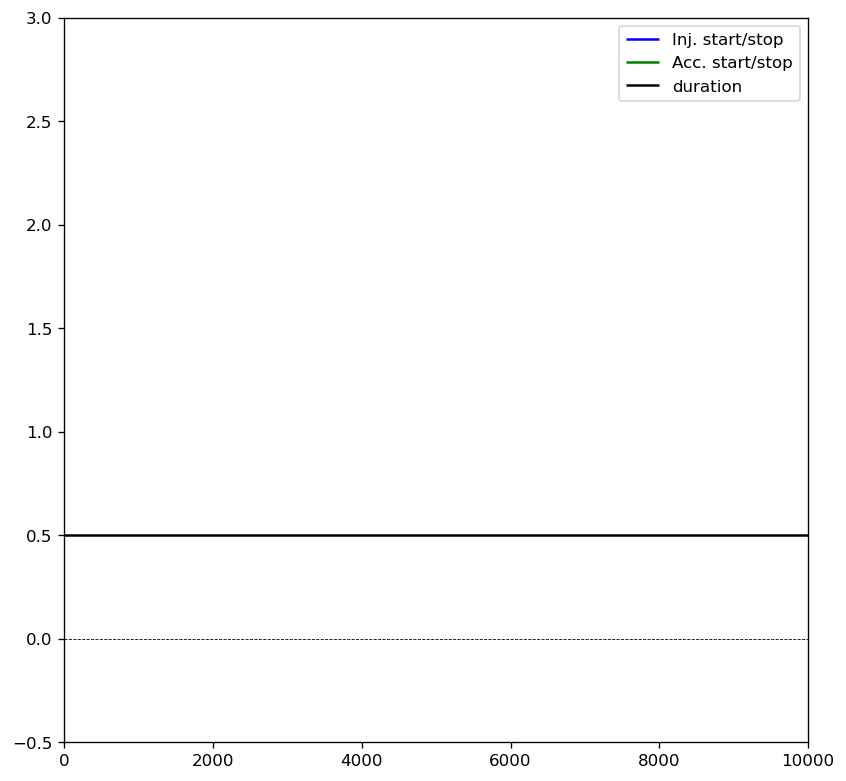

In [70]:
p=temp_ev_acc.plot_time_profile()

In [71]:
temp_ev_acc.run(only_injection=False)


temporal evolution running


temporal evolution completed


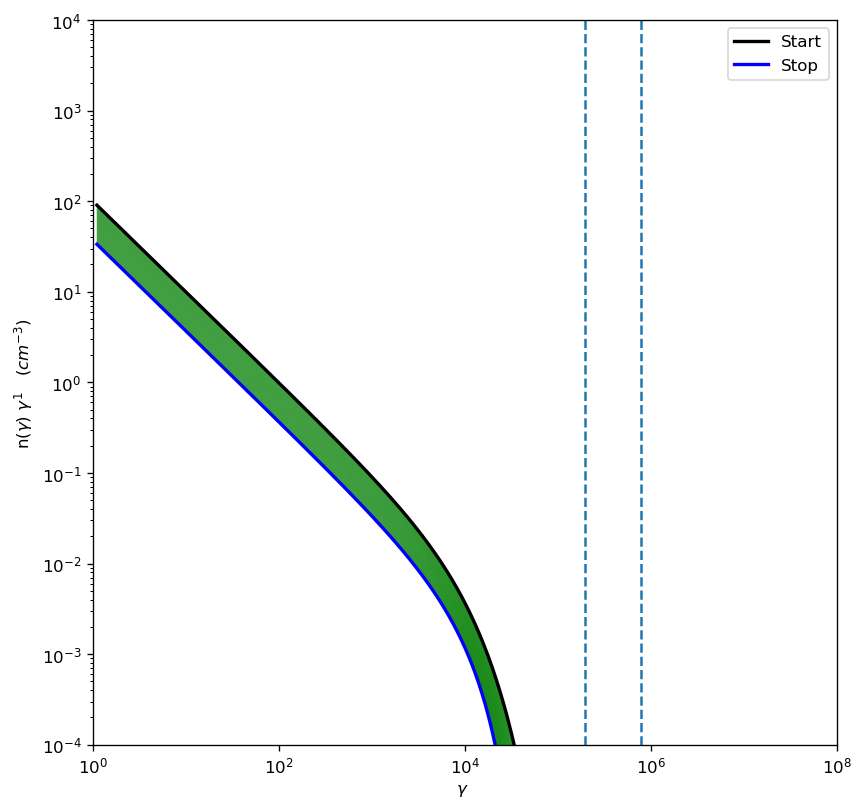

In [72]:
p=temp_ev_acc.plot_TempEv_emitters(loglog=False,energy_unit='gamma',pow=1)
p.ax.axvline(temp_ev_acc._temp_ev.gamma_eq_t_A, ls='--')
p.ax.axvline(temp_ev_acc._temp_ev.gamma_eq_t_D, ls='--')
p.rescale(x_max=1E8,x_min=1,y_min=1E-4,y_max=1E4)